In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Question 1

In [2]:
EP = np.array([1.98, 2.31, 3.29, 3.56, 1.23, 1.57, 2.05, 0.66, 0.31, 2.82, 0.13, 3.15, 2.72, 2.31, 1.92, 1.56, 0.94, 2.27, 3.17, 2.36])
CF = np.array([1.87, 2.20, 3.15, 3.42, 1.10, 1.41, 1.84, 0.68, 0.27, 2.80, 0.14, 3.20, 2.70, 2.43, 1.78, 1.53, 0.84, 2.21, 3.10, 2.34])

In [4]:
def LinearRegression(x, y, xtitle, ytitle, title):
    xaxis = np.linspace(np.min(x),np.max(x),2*len(x))
    xmean = np.mean(x)
    ymean = np.mean(y)

    S_xy = np.dot(x-xmean, y-ymean)
    S_xx = np.dot(x-xmean, x-xmean)
    
    slope = S_xy/S_xx
    intercept = ymean - slope*xmean
    plt.scatter(x, y, c='r', marker='.', label="Measured Data")
    plt.plot(xaxis, slope*xaxis + intercept, label="OLS")
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.legend()
    plt.grid(True)
    plt.title(title)

    return slope, intercept, ymean

### Graph of catalytic fluorimetric (CF) technique vs established extraction photometric (EP) technique

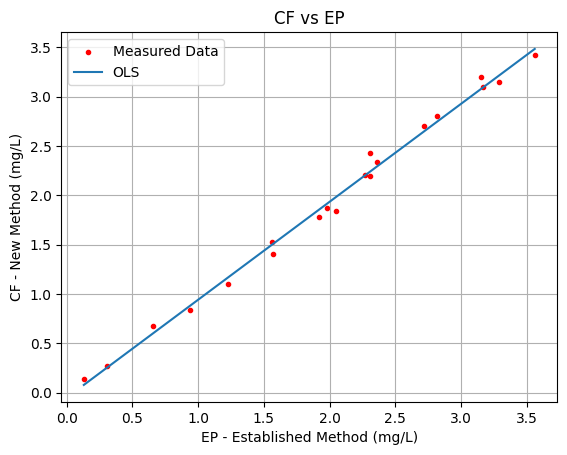

In [5]:
slope,intercept, CFavg  = LinearRegression(EP, CF, "EP - Established Method (mg/L)", "CF - New Method (mg/L)", "CF vs EP")

In [6]:
# Estimating the value of r^2
SSE = sum((CF-(slope*CF+intercept))**2)
SST = sum((CF-CFavg)**2)
r_sqrd = 1 - (SSE/SST)
r = np.sqrt(r_sqrd)
print("The value of R square is: ", '{0:.4f}'.format(r_sqrd))
print("The correctness of the fit is estimated by the value of R, where R is: " , '{0:.4f}'.format(r))
print("The value of R is very close to 1, this means the regressed line fits the data nicely. \nSo, we can say that the new method CF can be used for measuring the level of phytic acid in urine. ")

The value of R square is:  0.9954
The correctness of the fit is estimated by the value of R, where R is:  0.9977
The value of R is very close to 1, this means the regressed line fits the data nicely. 
So, we can say that the new method CF can be used for measuring the level of phytic acid in urine. 


In [6]:
x_want = 2.31
y_pred = slope*x_want + intercept
std_err = np.abs(np.std(EP-CF))
conf_interv = (y_pred - 2*std_err, y_pred + 2*std_err)

a = str(conf_interv[0])
a = a[:6]
b = str(conf_interv[1])
b = b[:6]
conf_interv = (float(a),float(b))

Text(0.5, 1.0, 'Confidence Interval Plot')

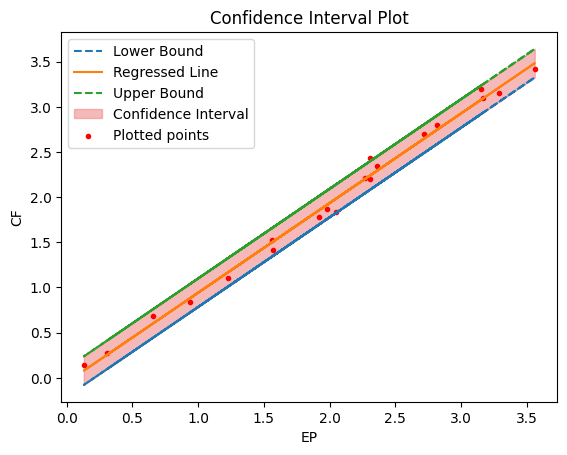

In [11]:
a = np.linspace(0.13, 3.56, 20)
plt.plot(EP, slope*EP + intercept - 2*std_err, '--', label='Lower Bound')
plt.plot(EP, slope*EP + intercept, label='Regressed Line')
plt.plot(EP, slope*EP + intercept + 2*std_err, '--', label='Upper Bound')
plt.fill_between(a, slope*a + intercept - 2*std_err, slope*a + intercept + 2*std_err, color='lightcoral', label="Confidence Interval", alpha=0.55)
plt.scatter(EP, CF, c='r', marker='.',label="Plotted points")
plt.legend()
plt.xlabel("EP")
plt.ylabel("CF")
plt.title("Confidence Interval Plot")

# Answer:

In [9]:
print("The predicted value of level of phytic acid in urine for measured EP = 2.31 is: ", '{0:.4f}'.format(y_pred), "mg/l")
print("The 95% confidence interval is given by the range: ", conf_interv, "mg/l")
print("The slope is:", '{0:.4f}'.format(slope))
print("The intercept is:", '{0:.4f}'.format(intercept))

The predicted value of level of phytic acid in urine for measured EP = 2.31 is:  2.2428 mg/l
The 95% confidence interval is given by the range:  (2.0848, 2.4006) mg/l
The slope is: 0.9924
The intercept is: -0.0497
